In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Read dataset to a dataframe
df = pd.read_csv('data5.csv')

df.head()

,Age,Gender,Education Level,Income Level,Distance to Polling Station,Registered Party,Weather Type,Temperature,Election Type,Political Climate,Social Media Activity,Campaign Efforts,Public Transport Access,Day of the Week,Cultural Event,Economic Conditions,Previous Turnout,Voter Turnout
0,50,Female,High School,Low,2 km,Independent,Sunny,25°C,Midterm,Positive,Moderate,Intense,No,Saturday,No,Stable,Medium,Yes
1,30,Male,High School,Low,6 km,Republican,Sunny,27°C,Midterm,Neutral,Moderate,Low,Yes,Monday,No,Declining,Low,No
2,40,Female,College,Medium,2 km,Democratic,Rainy,16°C,Local,Negative,Low,Moderate,No,Tuesday,Yes,Improving,High,No
3,65,Male,High School,Low,5 km,Independent,Rainy,15°C,Midterm,Negative,Low,Moderate,No,Saturday,No,Declining,Low,No
4,38,Female,College,High,1 km,Republican,Rainy,16°C,Local,Neutral,High,High,Yes,Tuesday,No,Declining,High,Yes


In [3]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Income Level',
       'Distance to Polling Station', 'Registered Party', 'Weather Type',
       'Temperature', 'Election Type', 'Political Climate',
       'Social Media Activity', 'Campaign Efforts', 'Public Transport Access',
       'Day of the Week', 'Cultural Event', 'Economic Conditions',
       'Previous Turnout', 'Voter Turnout'],
      dtype='object')

In [4]:
df.dtypes

Age                             int64
Gender                         object
Education Level                object
Income Level                   object
Distance to Polling Station    object
Registered Party               object
Weather Type                   object
Temperature                    object
Election Type                  object
Political Climate              object
Social Media Activity          object
Campaign Efforts               object
Public Transport Access        object
Day of the Week                object
Cultural Event                 object
Economic Conditions            object
Previous Turnout               object
Voter Turnout                  object
dtype: object

In [5]:
df.isnull().sum()

Age                            0
Gender                         0
Education Level                0
Income Level                   0
Distance to Polling Station    0
Registered Party               0
Weather Type                   0
Temperature                    0
Election Type                  0
Political Climate              0
Social Media Activity          0
Campaign Efforts               0
Public Transport Access        0
Day of the Week                0
Cultural Event                 0
Economic Conditions            0
Previous Turnout               0
Voter Turnout                  0
dtype: int64

In [6]:
df['Temperature'] = df['Temperature'].astype(str).str.replace('°C', '').astype(int)
df['Distance to Polling Station'] = df['Distance to Polling Station'].astype(str).str.extract('(\d+)').astype(int)

In [7]:
df.head()

,Age,Gender,Education Level,Income Level,Distance to Polling Station,Registered Party,Weather Type,Temperature,Election Type,Political Climate,Social Media Activity,Campaign Efforts,Public Transport Access,Day of the Week,Cultural Event,Economic Conditions,Previous Turnout,Voter Turnout
0,50,Female,High School,Low,2,Independent,Sunny,25,Midterm,Positive,Moderate,Intense,No,Saturday,No,Stable,Medium,Yes
1,30,Male,High School,Low,6,Republican,Sunny,27,Midterm,Neutral,Moderate,Low,Yes,Monday,No,Declining,Low,No
2,40,Female,College,Medium,2,Democratic,Rainy,16,Local,Negative,Low,Moderate,No,Tuesday,Yes,Improving,High,No
3,65,Male,High School,Low,5,Independent,Rainy,15,Midterm,Negative,Low,Moderate,No,Saturday,No,Declining,Low,No
4,38,Female,College,High,1,Republican,Rainy,16,Local,Neutral,High,High,Yes,Tuesday,No,Declining,High,Yes


In [8]:
cols = ['Gender', 'Education Level', 'Income Level','Registered Party', 'Weather Type','Election Type', 'Political Climate',
       'Social Media Activity', 'Campaign Efforts', 'Public Transport Access',
       'Day of the Week', 'Cultural Event', 'Economic Conditions',
       'Previous Turnout', 'Voter Turnout']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Education Level,Income Level,Distance to Polling Station,Registered Party,Weather Type,Temperature,Election Type,Political Climate,Social Media Activity,Campaign Efforts,Public Transport Access,Day of the Week,Cultural Event,Economic Conditions,Previous Turnout,Voter Turnout
0,50,0,1,1,2,1,2,25,1,2,2,1,0,2,0,2,2,1
1,30,1,1,1,6,2,2,27,1,1,2,2,1,1,0,0,1,0
2,40,0,0,2,2,0,1,16,0,0,1,3,0,5,1,1,0,0
3,65,1,1,1,5,1,1,15,1,0,1,3,0,2,0,0,1,0
4,38,0,0,0,1,2,1,16,0,1,0,0,1,5,0,0,0,1


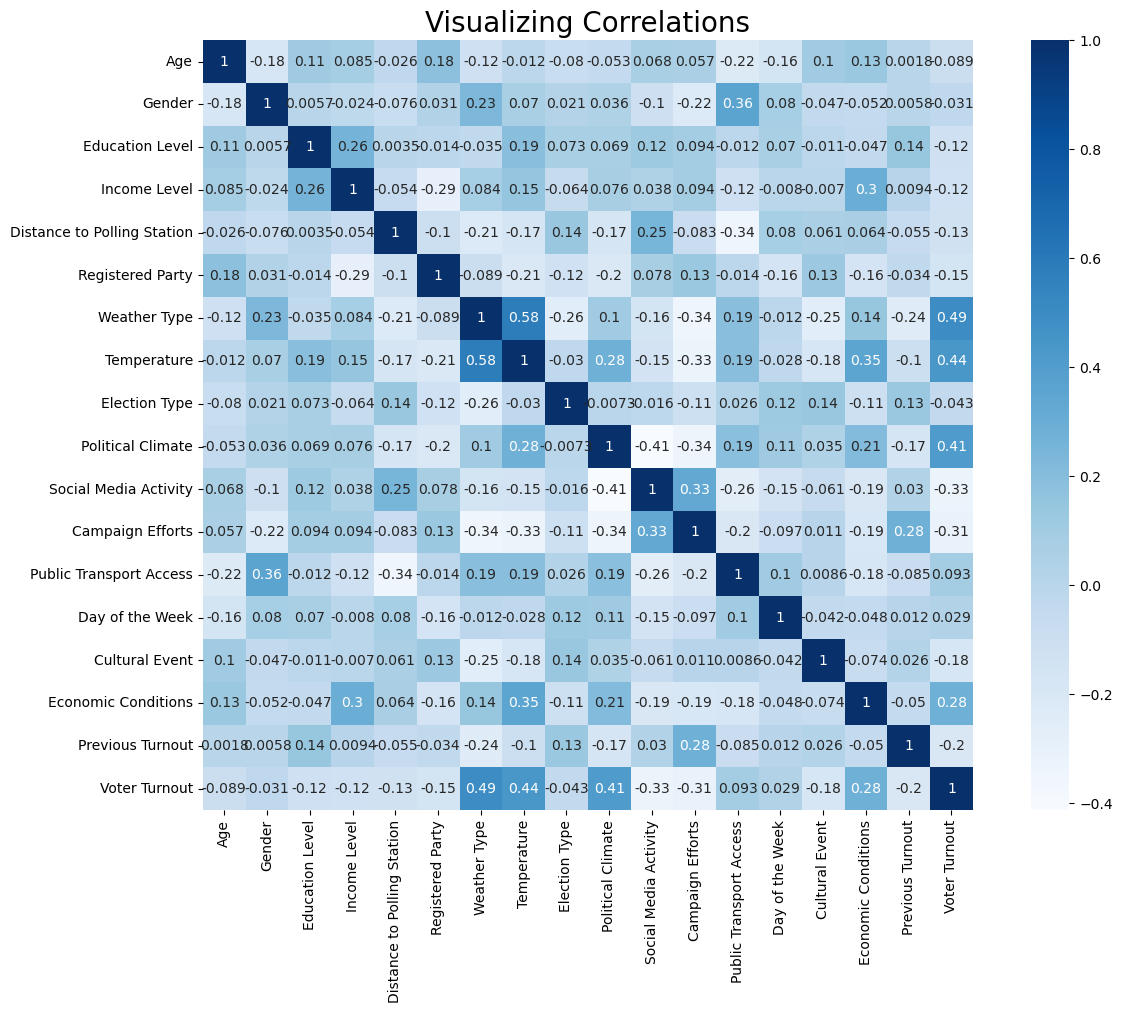

In [9]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

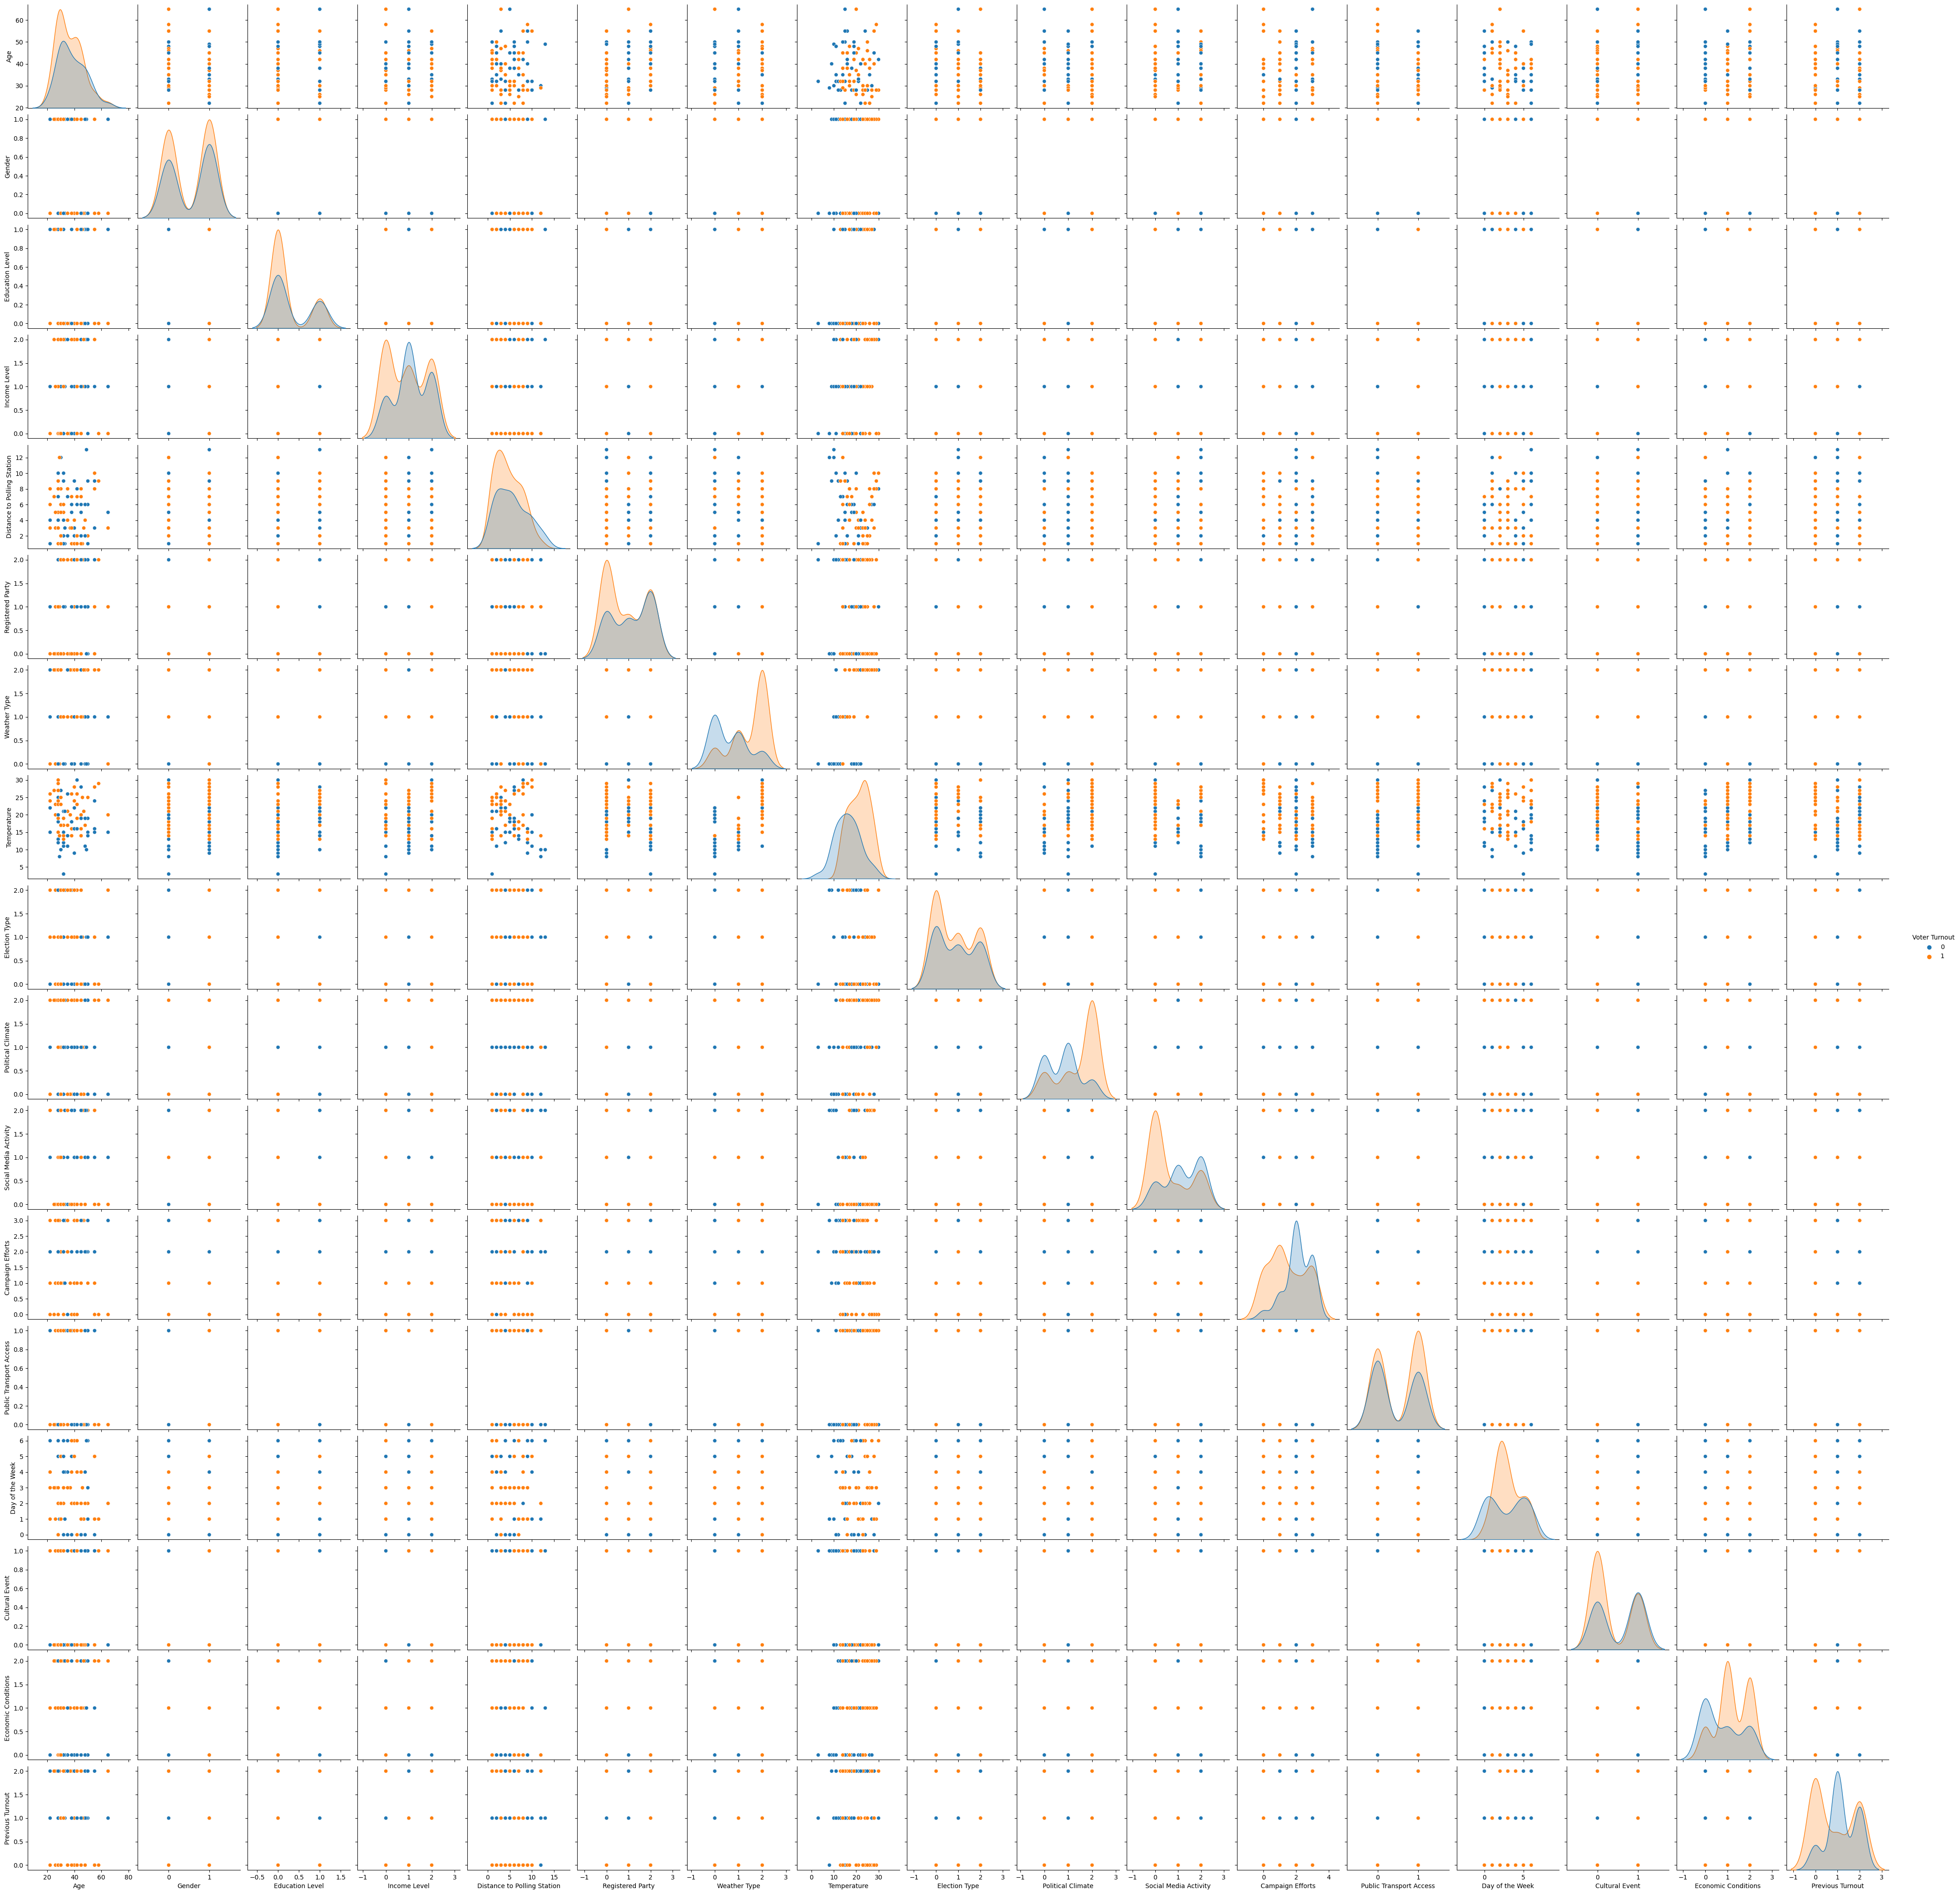

In [10]:
sns.pairplot(df,hue='Voter Turnout')

In [11]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Income Level',
       'Distance to Polling Station', 'Registered Party', 'Weather Type',
       'Temperature', 'Election Type', 'Political Climate',
       'Social Media Activity', 'Campaign Efforts', 'Public Transport Access',
       'Day of the Week', 'Cultural Event', 'Economic Conditions',
       'Previous Turnout', 'Voter Turnout'],
      dtype='object')

In [12]:
x = df[['Age', 'Gender', 'Education Level', 'Income Level',
       'Distance to Polling Station', 'Registered Party', 'Weather Type',
       'Temperature', 'Election Type', 'Political Climate',
       'Social Media Activity', 'Campaign Efforts', 'Public Transport Access',
       'Day of the Week', 'Cultural Event', 'Economic Conditions',
       'Previous Turnout']].values


y = df['Voter Turnout'].values

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=100,test_size=0.25)

In [14]:
x_train.shape
y_train.shape

(119,)

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC() 

svc.fit(x_train,y_train)

y_pred=svc.predict(x_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7000


In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.3

In [17]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.5477225575051661

In [18]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.761904761904762

In [19]:
svc.score(x_test,y_test)

0.7

Confusion matrix

 [[11  1]
 [11 17]]


<Axes: >

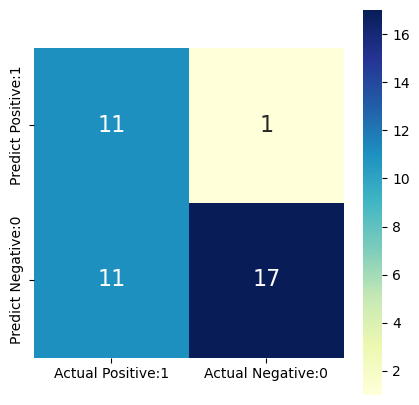

In [20]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu',square=True, ax=ax, annot_kws={"fontsize":16})

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
y_pred = rf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.05

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.22360679774997896

In [25]:
from sklearn.metrics import roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.9642857142857143

In [26]:
rf.score(x_test,y_test)

0.95

Confusion matrix

 [[12  0]
 [ 2 26]]


<Axes: >

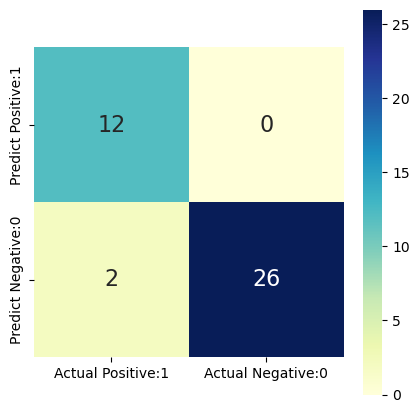

In [27]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu',square=True, ax=ax, annot_kws={"fontsize":16})

In [28]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))

In [33]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]))

[0]
